## Buid a trading strategy

### To test your trading strategy, you need to follow the steps: 1. load data; 2. create your signal 3.decide position each period based on your signal 4. analyze your time-series return


In [1]:
# import packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

import pandas as pd



In [2]:
data = sio.loadmat('MSFT_20141103.mat')  #load matlab data

In [3]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0][:,0]*1e-4)
ask = np.array(LOB['SellPrice'][0][0][:,0]*1e-4)
# retrieve time, bid and ask price


In [4]:
a=[bid,ask]


In [5]:
columns=['bid','ask']


In [101]:
data=pd.DataFrame(np.transpose(a),columns=columns,index=t) #create a Dataframe object to store the data
data['mid']=(data['bid']+data['ask'])/2 #generate a new column of midprice

In [7]:
data['SMA1'] = data['mid'].rolling(600).mean() # create a new column of simple moving average of previous 600 periods
data['SMA2'] = data['mid'].rolling(6000).mean() # create a new column of simple moving average of previous 6000 periods

In [8]:
df=data.iloc[:,2:]
df

,mid,SMA1,SMA2
0.1,46.740,NaN,NaN
0.2,46.775,NaN,NaN
0.3,46.805,NaN,NaN
0.4,46.840,NaN,NaN
0.5,46.835,NaN,NaN
...,...,...,...
23399.6,47.435,47.437258,47.409717
23399.7,47.435,47.437258,47.409730
23399.8,47.435,47.437258,47.409743
23399.9,47.435,47.437258,47.409757


<Axes: title={'center': 'MSFT | 1 min & 1 h  SMAs'}>

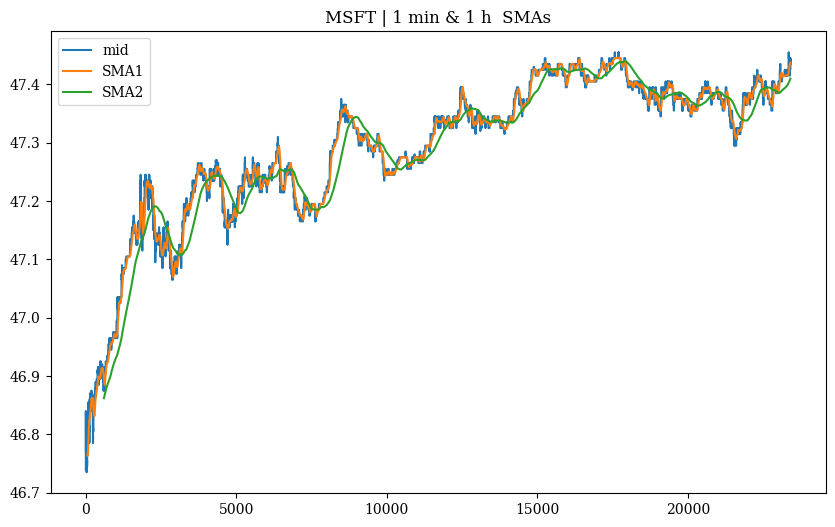

In [9]:
#plot the simple moving average
from pylab import mpl,plt

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

df.plot(title='MSFT | 1 min & 1 h  SMAs',
                   figsize=(10, 6))

In [10]:
df['position'] = np.where(df['SMA1'] > df['SMA2'],1, -1) #decide position based on previous signal

In [11]:
df.dropna(inplace=True)

<Axes: title={'center': 'Market Positioning'}>

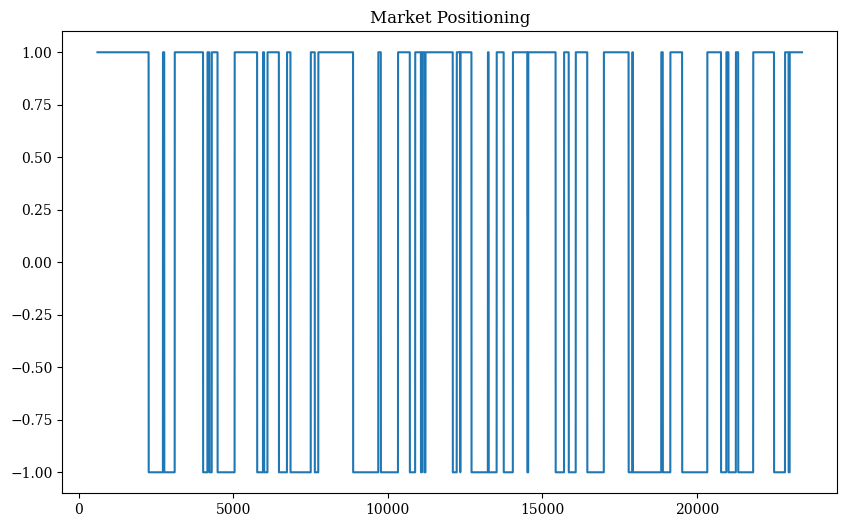

In [12]:
df['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning', figsize=(10, 6)) #plot position

In [13]:
df['returns'] = np.log(df['mid'] / df['mid'].shift(1)) 
# If your position is to long one share, you gain the return of the stock for the following period. 
# If your position is to short one share, you short the return of the stock for the following period. 

In [14]:
df['strategy'] = df['position'].shift(1) * df['returns']
# create a column of the time-series return of your trading strategy

In [15]:
df[['returns', 'strategy']].sum()
#calculate cummulative return of your strategy

returns     0.011876
strategy    0.001525
dtype: float64

<Axes: >

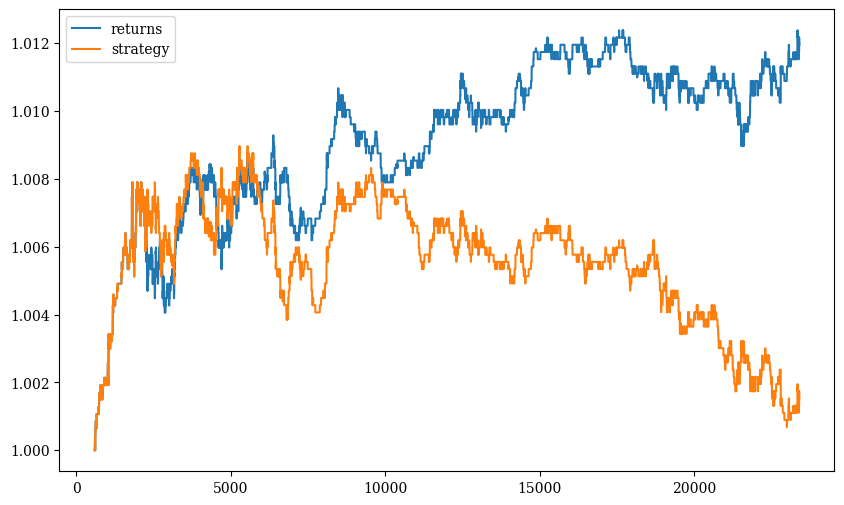

In [16]:
df[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6)) 
# plot your the return of the stock and the return of your strategy

In [102]:
data['returns']=np.log(data['mid'] / data['mid'].shift(1)) 
data.tail

<bound method NDFrame.tail of            bid    ask     mid   returns
0.1      46.73  46.75  46.740       NaN
0.2      46.75  46.80  46.775  0.000749
0.3      46.80  46.81  46.805  0.000641
0.4      46.80  46.88  46.840  0.000748
0.5      46.80  46.87  46.835 -0.000107
...        ...    ...     ...       ...
23399.6  47.43  47.44  47.435  0.000000
23399.7  47.43  47.44  47.435  0.000000
23399.8  47.43  47.44  47.435  0.000000
23399.9  47.43  47.44  47.435  0.000000
23400.0  47.43  47.44  47.435  0.000000

[234000 rows x 4 columns]>

## Let's backtest a momentum trading strategy


In [103]:
data['mom']=data['returns'].rolling(10).sum()
# the signal of momentum trading strategy is previous cumulative returns

In [104]:

data['position']=np.sign(data['mom'])
#position is determined based on the signal 'momentum'

In [105]:
data.dropna(inplace=True)

In [106]:
data

,bid,ask,mid,returns,mom,position
1.1,46.77,46.82,46.795,0.000000,0.001176,1.0
1.2,46.80,46.82,46.810,0.000320,0.000748,1.0
1.3,46.78,46.81,46.795,-0.000320,-0.000214,-1.0
1.4,46.77,46.81,46.790,-0.000107,-0.001068,-1.0
1.5,46.77,46.81,46.790,0.000000,-0.000961,-1.0
...,...,...,...,...,...,...
23399.6,47.43,47.44,47.435,0.000000,0.000000,0.0
23399.7,47.43,47.44,47.435,0.000000,0.000000,0.0
23399.8,47.43,47.44,47.435,0.000000,0.000000,0.0
23399.9,47.43,47.44,47.435,0.000000,0.000000,0.0


In [107]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [108]:
data[['returns', 'strategy']].sum()

returns     0.013584
strategy   -0.021881
dtype: float64